In [0]:
from keras.layers.core import Activation, Dense
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
import nltk 
import collections
import numpy as np

In [4]:
X_train = open('X_train.txt')
line = X_train.readline()
train = list()
while line:
    line = line.strip('\n')
    line = line.split()
    train.append(line)
    line = X_train.readline()
print(type(train))
print(len(train))
print(type(train[0]))

<class 'list'>
341072
<class 'list'>


In [5]:
X_valid = open('X_valid.txt')
line = X_valid.readline()
valid = list()
while line:
    line = line.strip('\n')
    line = line.split()
    valid.append(line)
    line = X_valid.readline()
print(type(valid))
print(len(valid))
print(type(valid[0]))

<class 'list'>
113691
<class 'list'>


In [0]:
y_train = open('y_train.txt')
label = list()
line = y_train.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    label.append(int(line[0]))
    line = y_train.readline()

In [7]:
len(label)

341072

In [8]:
type(label)

list

In [9]:
y_valid = open('y_valid.txt')
valid_label = list()
line = y_valid.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    valid_label.append(int(line[0]))
    line = y_valid.readline()
print(len(valid_label))

113691


In [10]:
type(valid_label)

list

In [0]:
import numpy as np
label = np.array(label)
train = np.array(train)
valid = np.array(valid)
valid_label = np.array(valid_label)

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train)
tokenizer.fit_on_texts(valid)

In [0]:
vocab=tokenizer.word_index

In [14]:
len(vocab)

448397

In [0]:
encoded_train = tokenizer.texts_to_sequences(train)
encoded_valid = tokenizer.texts_to_sequences(valid)

In [16]:
type(encoded_valid)

list

In [0]:
encoded_train = np.array(encoded_train)
encoded_valid = np.array(encoded_valid)

In [18]:
len(encoded_train)

341072

In [0]:
temp_len = 0
for i in range(len(encoded_train)):
    temp_len += len(encoded_train[i])

mean_len = temp_len / len(encoded_train)
mean_len = int(mean_len)

encoded_train = sequence.pad_sequences(encoded_train, maxlen=mean_len)

In [0]:
mean_len

80

In [0]:

temp_len = 3432
encoded_train = sequence.pad_sequences(encoded_train, maxlen=temp_len)

In [20]:
temp_len

3432

In [0]:
encoded_valid = sequence.pad_sequences(encoded_valid, maxlen=mean_len)

In [0]:
encoded_valid = sequence.pad_sequences(encoded_valid, maxlen=temp_len)

In [23]:
print(type(label))
label = label.reshape(-1,1)
print(type(label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
type(label)

numpy.ndarray

In [25]:
valid_label = valid_label.reshape(-1,1)
valid_label.shape

(113691, 1)

In [0]:
import keras
label_train = keras.utils.to_categorical(label)
valid_label = keras.utils.to_categorical(valid_label)

In [27]:
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras import layers
from keras.optimizers import Adam
from keras.models import Model,Sequential
import keras
embedding_dim = 128
model = Sequential()
model.add(layers.Embedding(len(vocab)+1, embedding_dim, input_length =temp_len))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(6,activation='softmax'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3432, 128)         57394944  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3428, 128)         82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 57,477,766
Trainable params: 57,477,766
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
from keras.callbacks import ModelCheckpoint

filepath = "best_weights.h5"
 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max', period=1)
callbacks_list = [checkpoint]
adam = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
history = model.fit(encoded_train, label_train,epochs=8,verbose=1,validation_data = (encoded_valid,valid_label),batch_size=500,callbacks = callbacks_list)





Train on 341072 samples, validate on 113691 samples
Epoch 1/8





341072/341072 [==============================] - 203s 596us/step - loss: 0.0757 - acc: 0.6745 - val_loss: 0.0651 - val_acc: 0.7126
Epoch 2/8
341072/341072 [==============================] - 193s 567us/step - loss: 0.0606 - acc: 0.7369 - val_loss: 0.0589 - val_acc: 0.7445
Epoch 3/8
341072/341072 [==============================] - 193s 567us/step - loss: 0.0545 - acc: 0.7665 - val_loss: 0.0555 - val_acc: 0.7622
Epoch 4/8
341072/341072 [==============================] - 193s 566us/step - loss: 0.0498 - acc: 0.7904 - val_loss: 0.0530 - val_acc: 0.7745
Epoch 5/8
341072/341072 [==============================] - 193s 565us/step - loss: 0.0455 - acc: 0.8132 - val_loss: 0.0513 - val_acc: 0.7853
Epoch 6/8
341072/341072 [==============================] - 193s 566us/step - loss: 0.0413 - acc: 0.8345 - val_loss: 0.0496 - val_acc: 0.7931
Epoch 7/8
341072/341072 [==============================] - 193s 566us/step - loss: 0.0372 - a

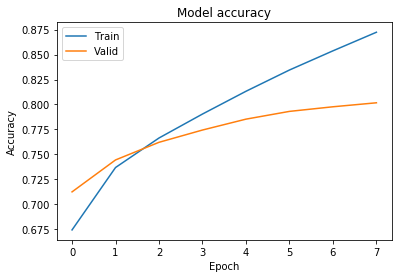

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

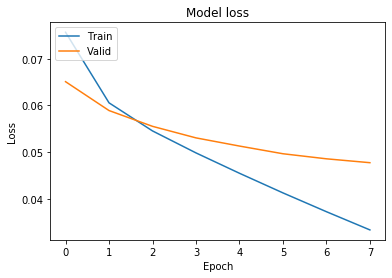

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [0]:
y_test = open('y_test.txt')
label_test = list()
line = y_test.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    label_test.append(int(line[0]))
    line = y_test.readline()

In [32]:
X_test = open('X_test.txt')
line = X_test.readline()
test = list()
while line:
    line = line.strip('\n')
    line = line.split()
    test.append(line)
    line = X_test.readline()
print(type(test))
print(len(test))
print(type(test[0]))

<class 'list'>
113691
<class 'list'>


In [0]:
encoded_test = tokenizer.texts_to_sequences(test)
encoded_test = np.array(encoded_test)
encoded_test = sequence.pad_sequences(encoded_test, maxlen=temp_len)

In [0]:
from keras.models import load_model

model = load_model('best_weights.h5')

predict_test = model.predict(encoded_test)

In [36]:
acc_num = 0
for i in range(len(encoded_test)):
    cla = np.argmax(predict_test[i])
    if cla == label_test[i]:
        acc_num = acc_num + 1

print(acc_num/len(encoded_test))

0.8021479272765655


In [0]:

fw = open("error_text.txt", 'w')
acc_num = 0
for i in range(len(encoded_test)):
    cla = np.argmax(predict_test[i])
    if cla == label_test[i]:
        fw.write(str(test[i]))
        fw.write("\n")